之前我们了解了一维数据的分桶（`histgram`），本文来了解二维数据分桶。原理是将一个二维坐标系划分成若干个格子，一组数据点落在哪个格子里，哪个格子的计数就 加 1。不同于一维数据可以用高度表示计数，二维数据需要使用颜色条计数。

In [83]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Heiti TC']

np.random.seed(1)
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
c = np.random.randn(10000, )

```python
hexbin(x, y, C=None, gridsize=100, bins=None, xscale='linear', yscale='linear', extent=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors='face', reduce_C_function=<function mean>, mincnt=None, marginals=False, *, data=None, **kwargs)
```

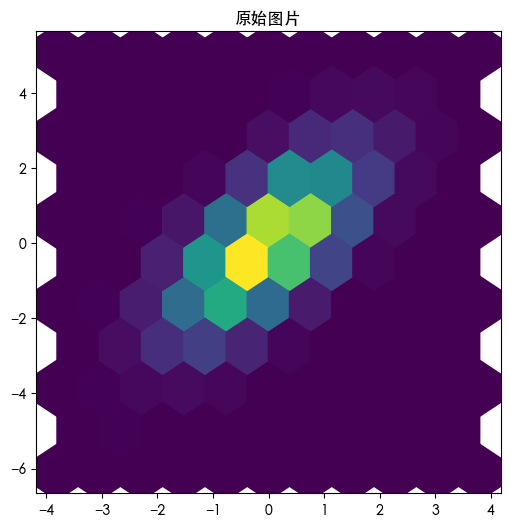

In [125]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.hexbin(x, y, gridsize=10)
ax.set_title('原始图片')

plt.show()

# `x``y``data`
数据源，不再赘述。

# `C`
与 `x`、`y` 长度相等的数组，默认值为 1。若提供，则 C 累积到分箱上。

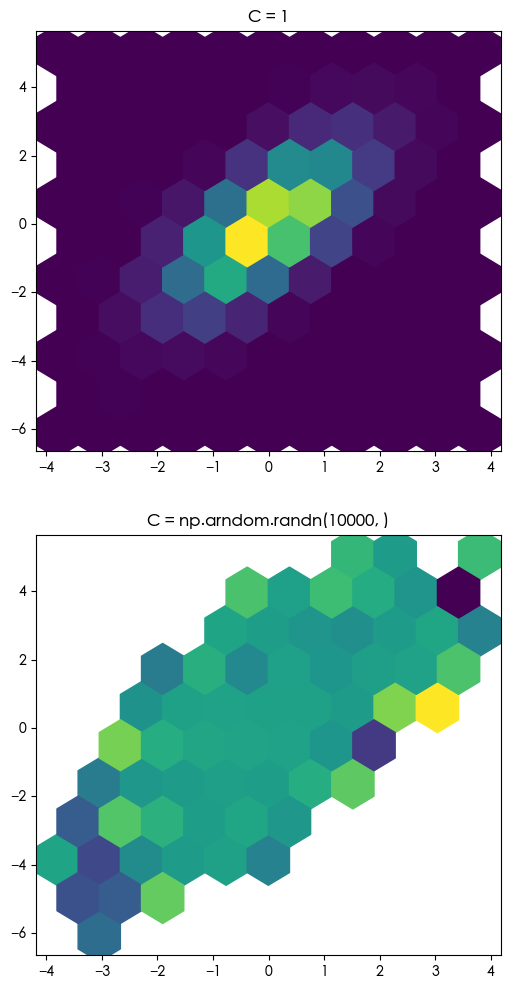

In [124]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title('C = 1')

ax2.hexbin(x, y, gridsize=10, C = c)
ax2.set_title('C = np.arndom.randn(10000, )')

plt.show()

# `gridsize`
一个整数或两个整数组成的序列，默认值为 100。如果是一个整数，则 x 轴上显示这个数量的六边形，y 轴上显示的数量约是 x 轴的 $\frac{1}{\sqrt{3}}$ 倍。如果是一个序列，序列的值为 x 轴、y 轴上显示的六边形数量。

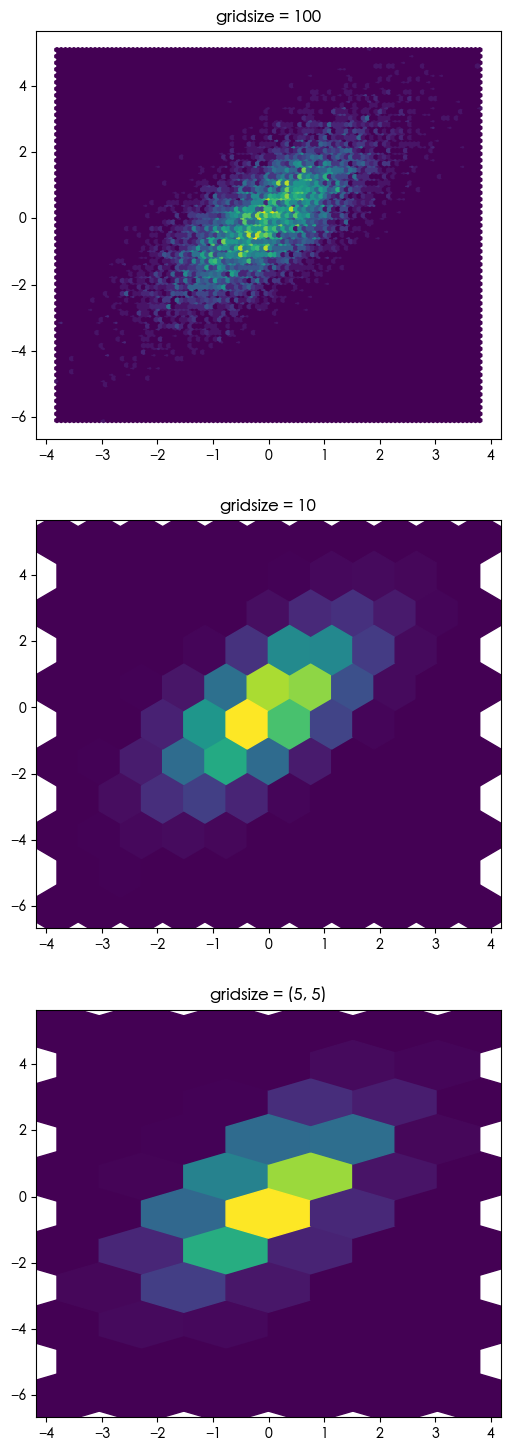

In [126]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize = (6, 18))

ax1.hexbin(x, y)
ax1.set_title('gridsize = 100')

ax2.hexbin(x, y, gridsize = 10)
ax2.set_title('gridsize = 10')

ax3.hexbin(x, y, gridsize = (5, 5))
ax3.set_title('gridsize = (5, 5)')

plt.show()

# `bins`
'log' 或整数或序列，默认值为 None。分箱依据。
- 若为 `None`，每个六边形的颜色直接与它的计数对应。
- 若为 `log`，先对每个六边形的值进行 $log_{10}(i+1)$ 处理。
- 若为一个整数，这个数值为分箱的个数进行分箱，然后将不同分箱以它们的数值染色。
- 若为一个序列，则为分箱的区间。

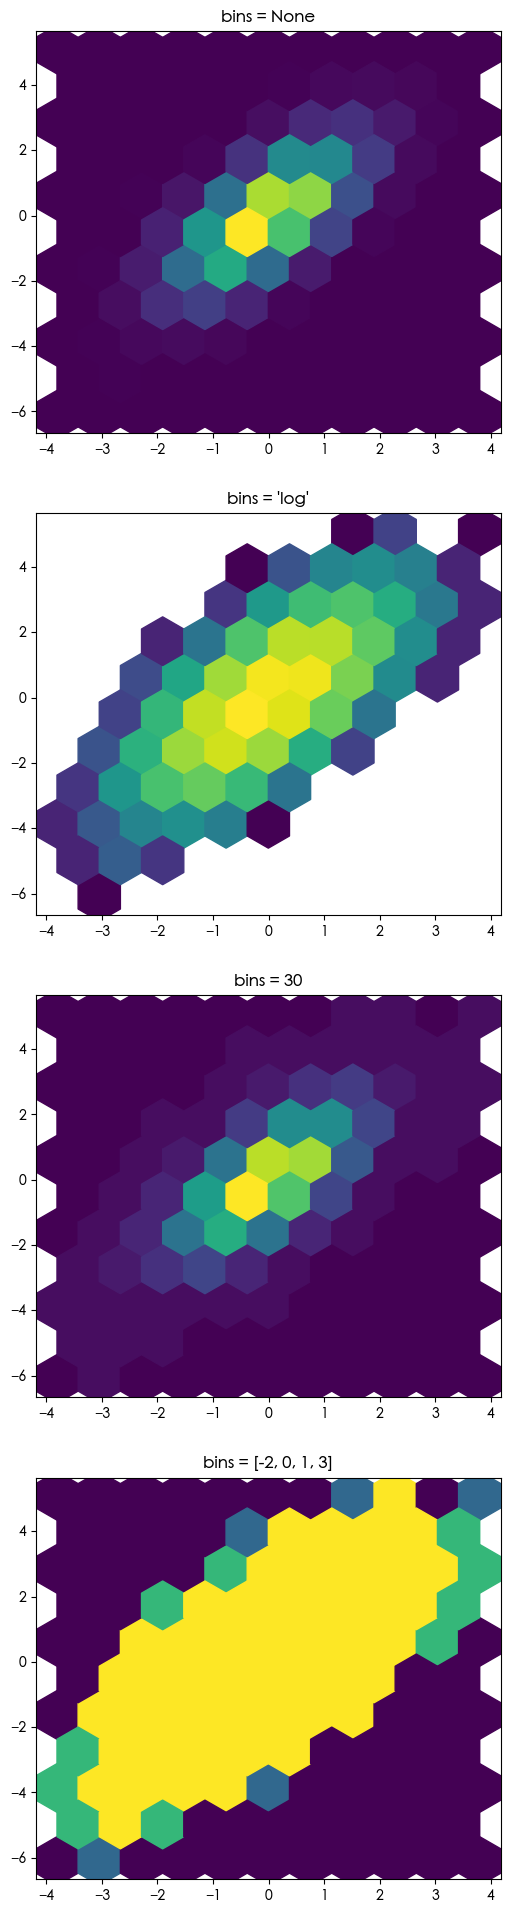

In [127]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize = (6, 24))

ax1.hexbin(x, y, gridsize = 10)
ax1.set_title('bins = None')

ax2.hexbin(x, y, gridsize = 10, bins = 'log')
ax2.set_title("bins = 'log'")

ax3.hexbin(x, y, gridsize = 10, bins = 30)
ax3.set_title('bins = 30')

ax4.hexbin(x, y, gridsize = 10, bins = [-2, 0, 1, 3])
ax4.set_title('bins = [-2, 0, 1, 3]')

plt.show()

# `xscale` & `yscale`
可为 `linear` 或 `log`，默认为 `linear`。x 轴或 y 轴的刻度度量。

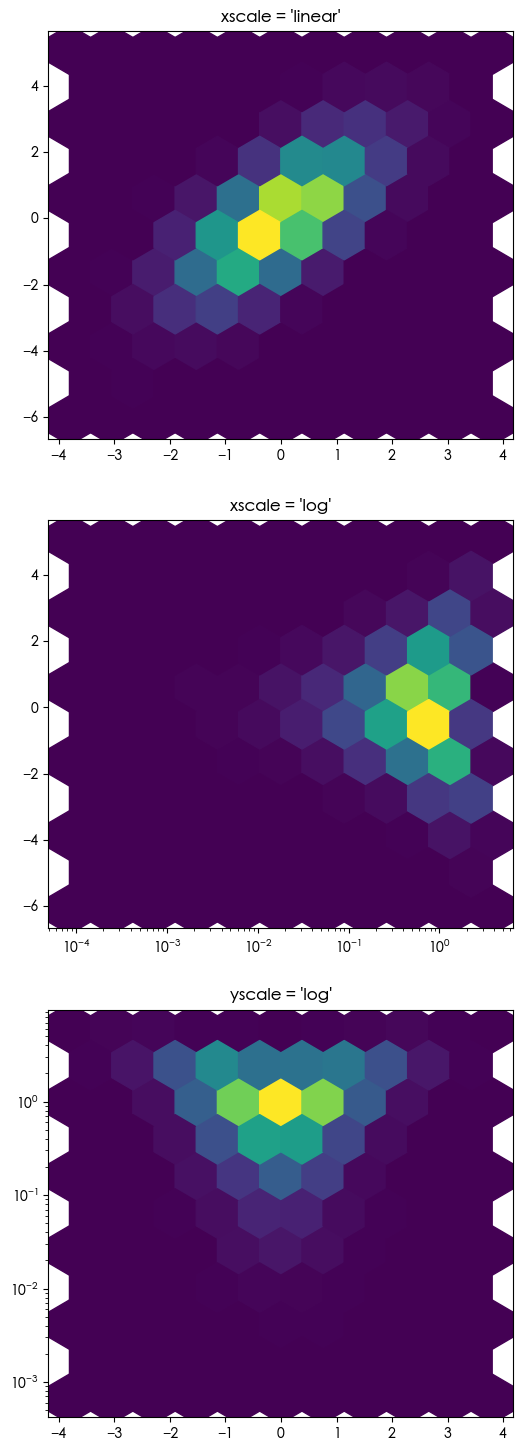

In [128]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize = (6, 18))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title("xscale = 'linear'")

ax2.hexbin(abs(x), y, gridsize=10, xscale = 'log')
ax2.set_title("xscale = 'log'")

ax3.hexbin(x, abs(y), gridsize=10, yscale = 'log')
ax3.set_title("yscale = 'log'")

plt.show()

# `extent`
4 个浮点数的序列，默认为 `None`。将分箱的极值限制在 `(xmin, xmax, ymin, ymax)` 之内，超过的部分被丢弃。

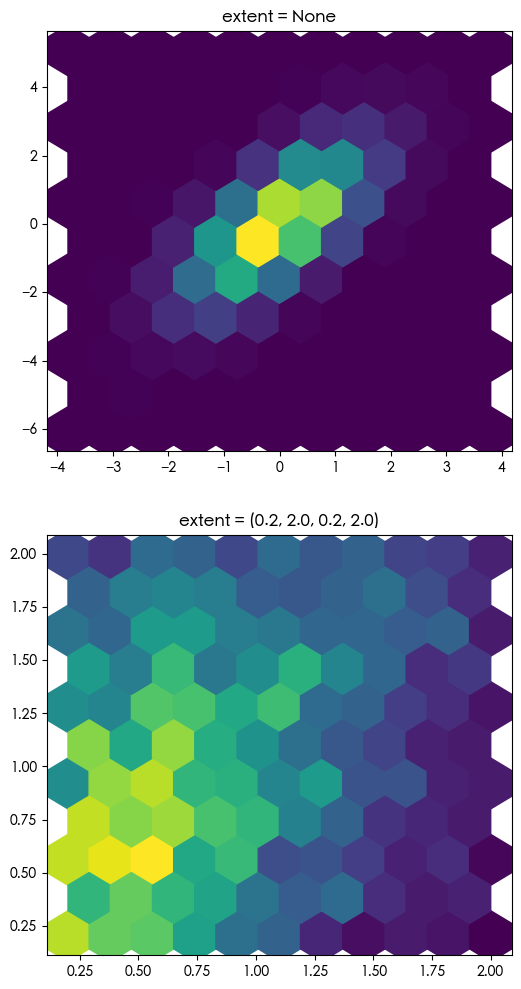

In [129]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title("extent = None")

ax2.hexbin(x, y, gridsize=10, extent = (0.2, 2.0, 0.2, 2.0))
ax2.set_title("extent = (0.2, 2.0, 0.2, 2.0)")

plt.show()

# `cmap`
字符串或 `Colormap` 对象，默认值为 `rcParams["image.cmap"]`，默认值为 `'viridis'`。色彩空间实例或预定义的色彩空间。

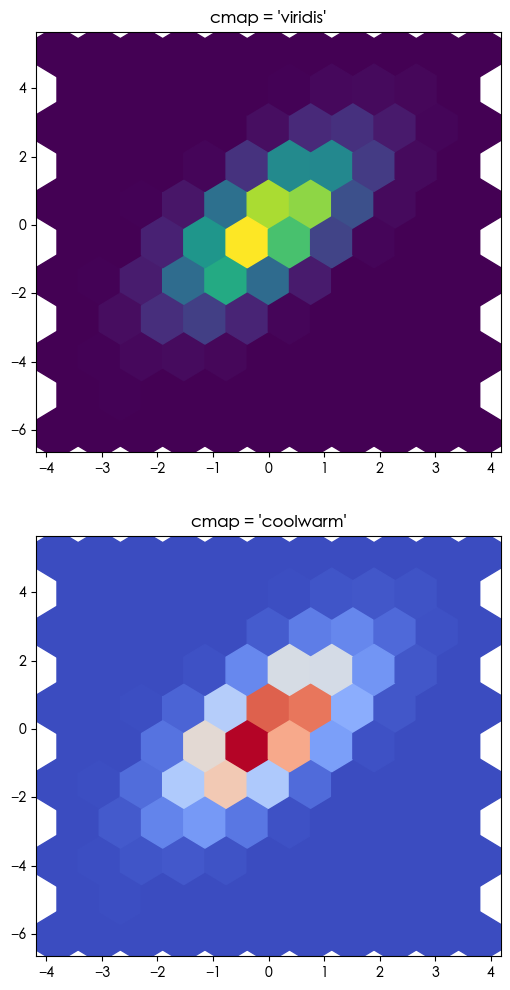

In [130]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title("cmap = 'viridis'")

ax2.hexbin(x, y, gridsize=10, cmap = 'coolwarm')
ax2.set_title("cmap = 'coolwarm'")

plt.show()

# `norm`
字符串或 `matplotlib.colors.Normalize` 实例，默认为 `linear`。将计数进行归一化的方法，要么是一个 `matplotlib.colors.Normalize` 实例，要么是 `matplotlib.scale.get_scale_names()` 里预存的方法，比如 "linear"、"log"、"symlog"、"logit" 等。

In [109]:
import matplotlib
class New_Norm(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, clip=False):
        super().__init__()
        self._vmin = vmin
        self._vmax = vmax
        self._clip = clip
        
    def __call__(self, values):
        _min = self._vmin if self._vmin else min(values)
        _max = self._vmax if self._vmax else max(values)
        res = (np.array(values) - _min) / _max
        return res
new_norm = New_Norm()

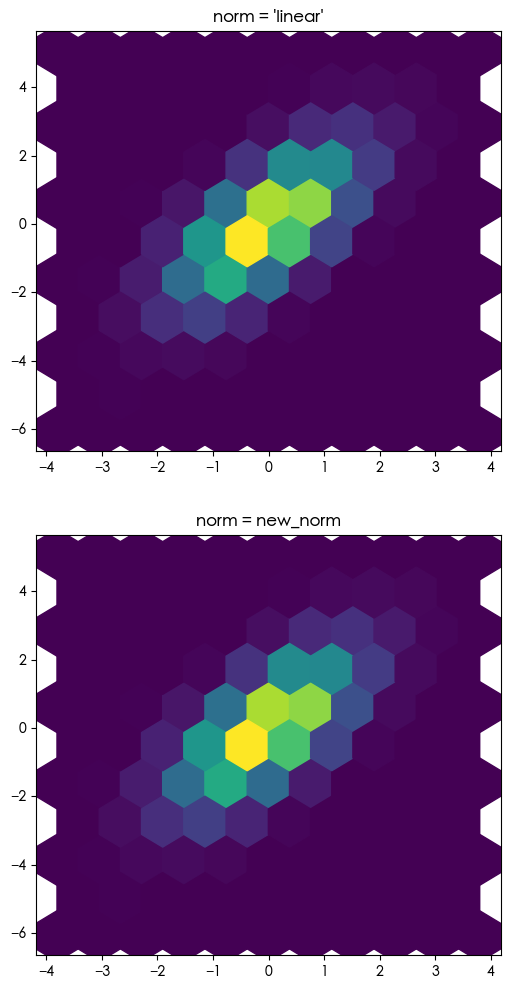

In [131]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title("norm = 'linear'")

ax2.hexbin(x, y, gridsize=10, norm = new_norm)
ax2.set_title("norm = new_norm")

plt.show()

# `vmin` & `vmax`
浮点数，默认值为 `None`。定义了色彩空间覆盖的数据范围。

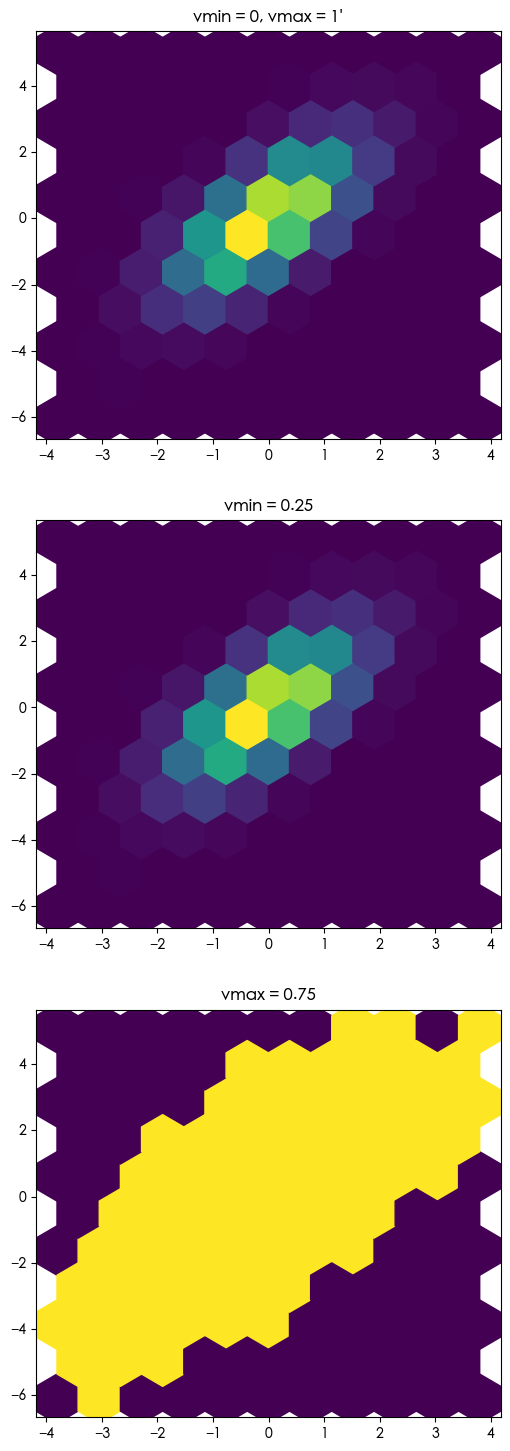

In [132]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize = (6, 18))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title("vmin = 0, vmax = 1'")

ax2.hexbin(x, y, gridsize=10, vmin = 0.25)
ax2.set_title("vmin = 0.25")

ax3.hexbin(x, y, gridsize=10, vmax = 0.75)
ax3.set_title("vmax = 0.75")
fig.savefig('pics/1-10-9.png')
plt.show()

# `alpha`
0 ~ 1 之间的浮点数，默认为 1。图像的透明度。

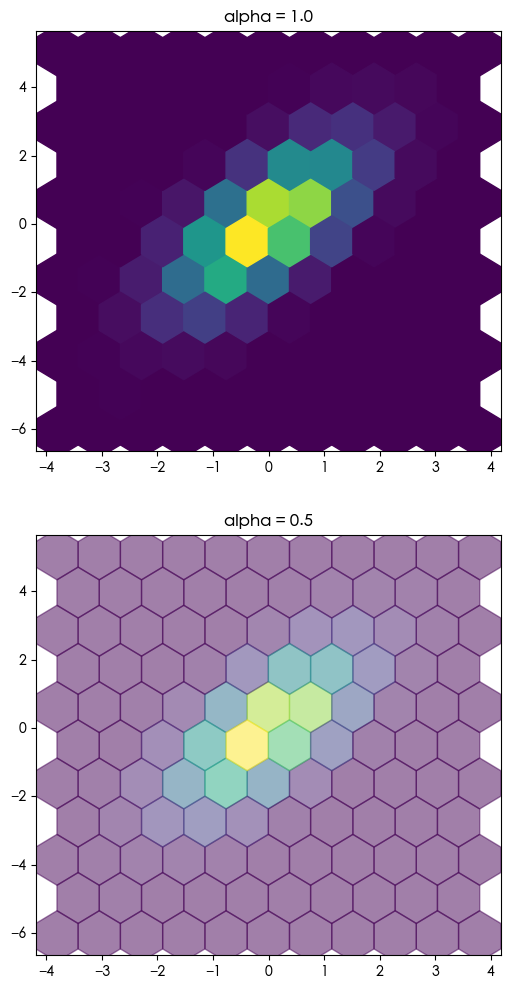

In [133]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title("alpha = 1.0")

ax2.hexbin(x, y, gridsize=10, alpha = 0.5)
ax2.set_title("alpha = 0.5")

plt.show()

# `linewidths`
浮点数，默认为 1.0。六边形的边宽。（透明度调高以便显示）

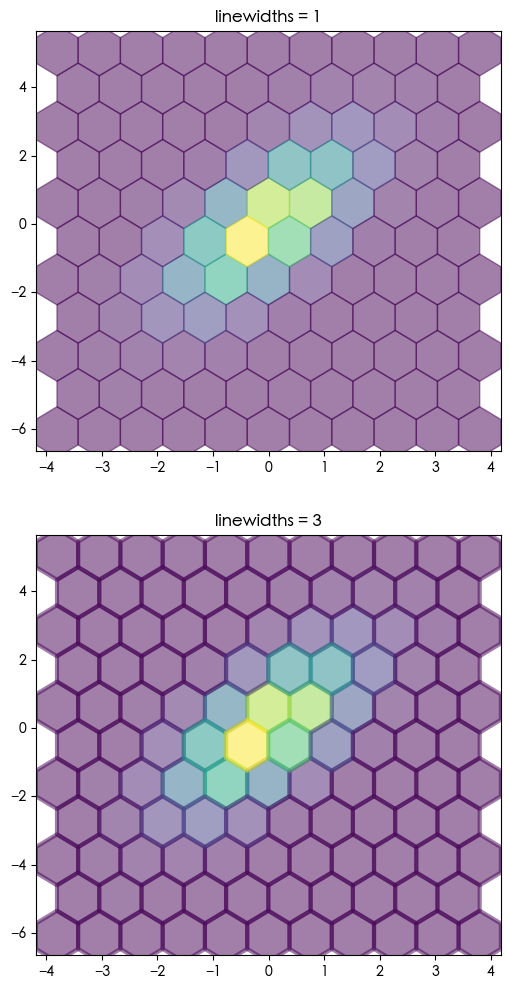

In [139]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10, alpha = 0.5)
ax1.set_title("linewidths = 1")

ax2.hexbin(x, y, gridsize=10, alpha = 0.5, linewidths = 3)
ax2.set_title("linewidths = 3")
fig.savefig('pics/1-10-11.png')
plt.show()

# `edgecolors`
一个颜色字符串或 `'face'` 或 `'none'` 或 `None`，默认值为 `'face'`。（透明度调高以便显示）
- 颜色字符串：指定六边形的边的颜色。
- `None`：默认颜色。
- `'face'`：六边形本体相同的颜色。
- `'none'`：不绘制边。

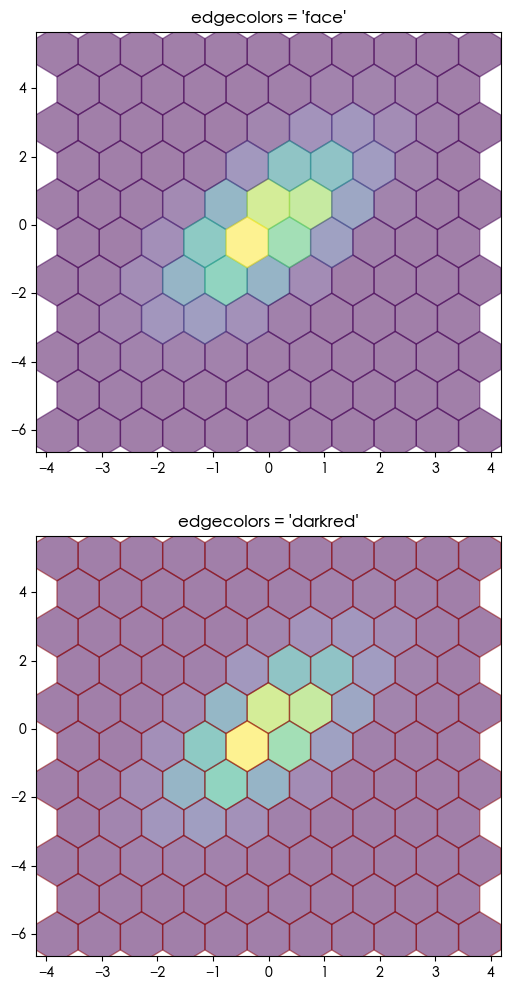

In [140]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10, alpha = 0.5)
ax1.set_title("edgecolors = 'face'")

ax2.hexbin(x, y, gridsize=10, alpha = 0.5, edgecolors = 'darkred')
ax2.set_title("edgecolors = 'darkred'")
fig.savefig('pics/1-10-12.png')
plt.show()

# `reduce_C_function`
一个返回浮点数的函数，默认为 `np.mean`。将 C 累积到分箱上的方法。

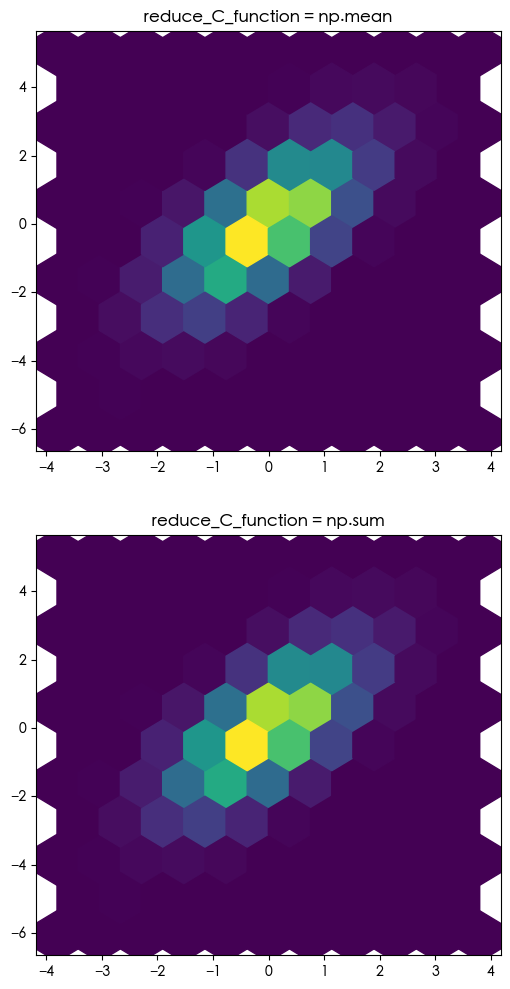

In [141]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title("reduce_C_function = np.mean")

ax2.hexbin(x, y, gridsize=10, reduce_C_function = np.sum)
ax2.set_title("reduce_C_function = np.sum")
fig.savefig('pics/1-10-13.png')
plt.show()

# `mincut`
正整数，默认为 `None`。只绘制大于这个数值的六边形。

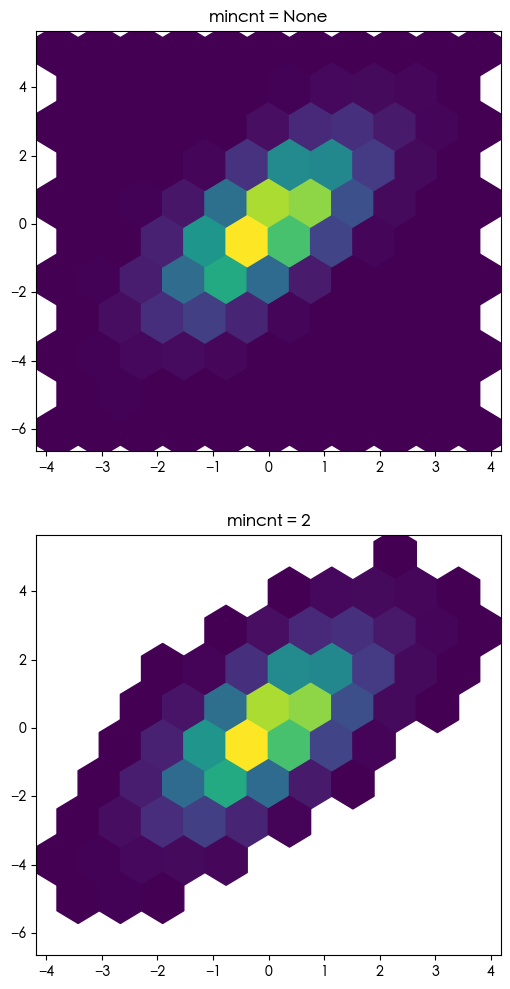

In [137]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title("mincnt = None")

ax2.hexbin(x, y, gridsize=10, mincnt = 2)
ax2.set_title("mincnt = 2")

plt.show()

# `marginals`
布尔值，默认为 `False`。若为 True，则图像左边和下边绘制密度的长方体。

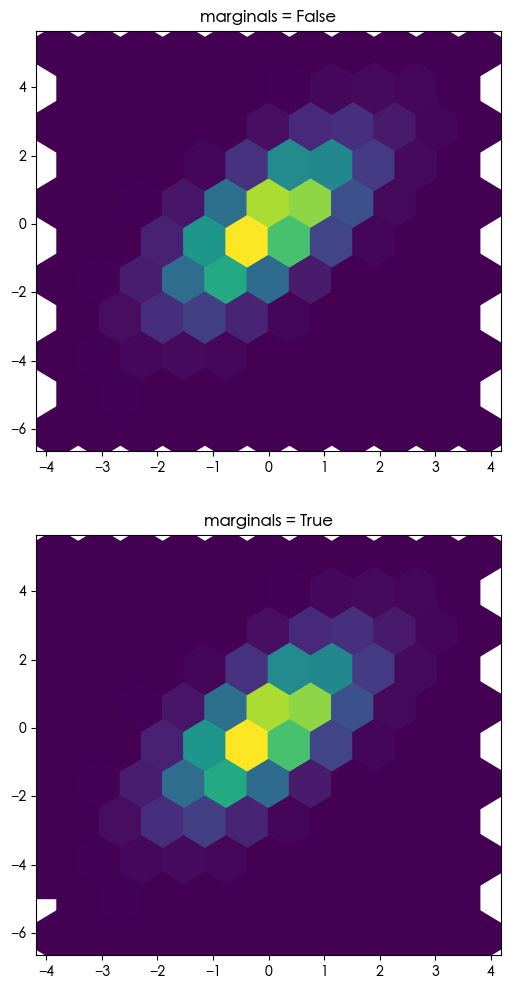

In [138]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (6, 12))

ax1.hexbin(x, y, gridsize=10)
ax1.set_title("marginals = False")

ax2.hexbin(x, y, gridsize=10, marginals = True)
ax2.set_title("marginals = True")

plt.show()

# `**kwargs`
`matplotlib.collections.PolyCollection` 的参数，以后可以专门讲一下这个类。